In [39]:
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline        

In [40]:
data = pd.read_csv('gbm-data.csv')
X = data.iloc[:, 1:]
y = data['Activity']

In [41]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

train_loss = {}
test_loss = {}

for rate in learning_rate:
    model = GradientBoostingClassifier(n_estimators=250, random_state=241, verbose=True, learning_rate=rate)
    model.fit(X_train, y_train)
    
    train_loss[rate] = []
    test_loss[rate] = []
    
    for y_pred in model.staged_decision_function(X_train):
        train_loss[rate].append(log_loss(y_train,sigmoid(y_pred)))
    
    for y_pred in model.staged_decision_function(X_test):
        test_loss[rate].append(log_loss(y_test,sigmoid(y_pred)))  

      Iter       Train Loss   Remaining Time 
         1           1.0190           13.49s
         2           0.9192           13.17s
         3           0.8272           13.16s
         4           0.7834           13.38s
         5           0.7109           13.55s
         6           0.6368           13.40s
         7           0.5797           13.27s
         8           0.5610           13.29s
         9           0.5185           13.33s
        10           0.4984           13.21s
        20           0.1999           12.75s
        30           0.1313           12.10s
        40           0.0790           11.46s
        50           0.0511           10.83s
        60           0.0352           10.28s
        70           0.0245            9.76s
        80           0.0162            9.19s
        90           0.0114            8.66s
       100           0.0077            8.11s
       200           0.0002            2.63s
      Iter       Train Loss   Remaining Time 
        

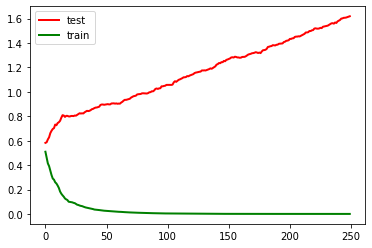

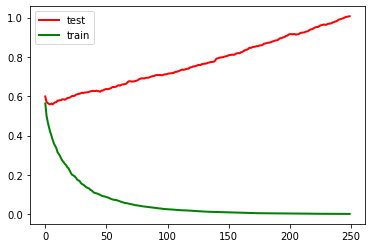

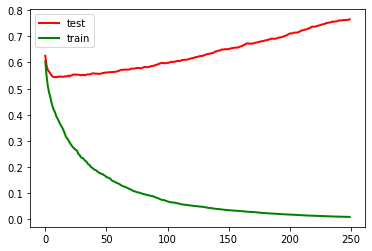

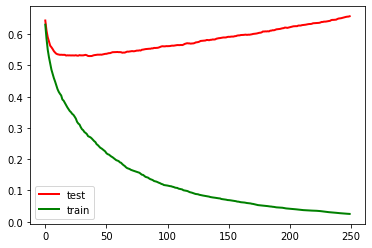

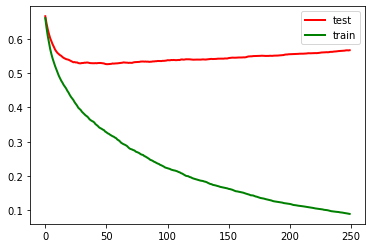

In [45]:
for rate in learning_rate:
    plt.figure()
    plt.plot(test_loss[rate], 'r', linewidth=2)
    plt.plot(train_loss[rate], 'g', linewidth=2)
    plt.legend(['test', 'train'])
plt.show()

In [46]:
with open('1.txt', 'w') as f:
    f.write('overfitting')

In [47]:
def min_iter_to_score(scores):
    min_score = scores[0]
    min_iter = 1
    for i, score in enumerate(scores):
        if score < min_score:
            min_score = score
            min_iter = i+1
    return min_score, min_iter

In [48]:
min_score, min_iter = min_iter_to_score(test_loss[0.2])
min_score, min_iter

(0.5301645204906471, 37)

In [53]:
with open('2.txt', 'w') as f:
    f.write(str(round(min_score, 2)) + ' ' + str(min_iter))

In [50]:
model = GradientBoostingClassifier(n_estimators=min_iter, random_state=241, verbose=True, learning_rate=0.2)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2613            2.11s
         2           1.1715            1.82s
         3           1.1009            1.71s
         4           1.0529            1.65s
         5           1.0130            1.64s
         6           0.9740            1.56s
         7           0.9475            1.48s
         8           0.9197            1.40s
         9           0.8979            1.39s
        10           0.8730            1.38s
        20           0.7207            0.85s
        30           0.6055            0.34s


GradientBoostingClassifier(learning_rate=0.2, n_estimators=37, random_state=241,
                           verbose=True)

In [51]:
y_pred = model.predict_proba(X_test)
test_loss = log_loss(y_test, y_pred)
test_loss

0.5301645204906471

In [52]:
with open('3.txt', 'w') as f:
    f.write(str(round(test_loss, 2)))